<br>

# 다항회귀 (Polynomial Regression) 

비선형. 비단조.  
선형가정이 어긋나는 경우에 데이터에 대한 회귀분석 모델을 작성하는 방법이다. 직선일 때보다 종속변수에 대해 잘 설명할 수 있으므로 결정계수가 1에 가까워진다.   
독립변수의 개수가 늘어나는 다중회귀와는 다항회귀는 달리 독립변수의 차수가 높아진다.

차수가 높아지면 새로운 속성도 기하급수적으로 늘어나 계산 시간이 오래걸리고 과적합(overfitting) 문제가 발생한다. 따라서 보통 2차식 또는 3차식을 사용한다.  



<br>

## 차원확대 : `np.newaxis`  


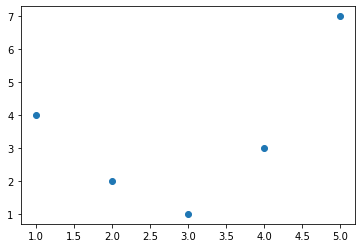

[2.  2.7 3.4 4.1 4.8]


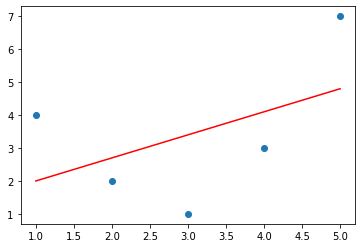

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])

plt.scatter(x, y)
plt.show()

#선형회귀모델일 경우
from sklearn.linear_model import LinearRegression
x = x[:, np.newaxis]  #차원확대. 1차원 벡터에서 2차원 행렬로
#print(x)

model = LinearRegression().fit(x, y)
ypred = model.predict(x)
print(ypred)  #예측이 잘안되고 있음  #[2.  2.7 3.4 4.1 4.8]

#그래프와 추세선
plt.scatter(x, y)
plt.plot(x, ypred, c='red')
plt.show()


예측이 제대로 이루어지지 않고 선형을 띈다. 조금 더 복잡한 모델이 필요하다. -> 다항식 특징을 추가한다.  



<br>

## 다항회귀 모델  



<br>

### `PolynomialFeatures`  


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False)  #기본적인 다항식 형태를 만든다.  
#degree값이 늘어날 때마다 열이 추가됨. 열의 개수가 늘어날 수록 COST가 줄어들고 실제값에 가까워짐
#그러나 너무 높게 부여하면 과적합 문제가 발생할 수 있다. 

x2 = poly.fit_transform(x)  #새롭게 만들어진 numpy 배열을 행별로 다항 형태로 변형한다.
print(x2)

[[ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]]


<br>

### 모델 작성 



[4.14285714 1.62857143 1.25714286 3.02857143 6.94285714]


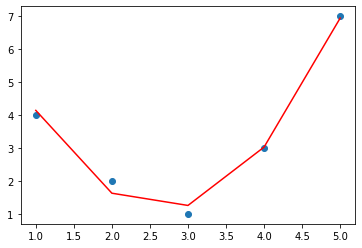

In [ ]:
model2 = LinearRegression().fit(x2, y)
ypred2 = model2.predict(x2)
print(ypred2)

#그래프와 추세선
plt.scatter(x, y)
plt.plot(x, ypred2, c='red')
plt.show()

<br>

## 연습 


[[258]
 [270]
 [294]
 [320]
 [342]
 [368]
 [396]
 [446]
 [480]
 [586]] (10, 1)
[236 234 253 298 314 342 360 368 391 390]
[250.63869122 256.03244588 261.42620055 266.81995521 272.21370988
 277.60746454 283.00121921 288.39497387 293.78872854 299.1824832
 304.57623787 309.96999254 315.3637472  320.75750187 326.15125653
 331.5450112  336.93876586 342.33252053 347.72627519 353.12002986
 358.51378452 363.90753919 369.30129385 374.69504852 380.08880318
 385.48255785 390.87631252 396.27006718 401.66382185 407.05757651
 412.45133118 417.84508584 423.23884051 428.63259517 434.02634984]
[215.50100168 228.03388862 240.11490613 251.74405421 262.92133285
 273.64674206 283.92028183 293.74195218 303.11175309 312.02968457
 320.49574661 328.50993923 336.07226241 343.18271616 349.84130048
 356.04801536 361.80286081 367.10583683 371.95694342 376.35618057
 380.30354829 383.79904658 386.84267544 389.43443486 391.57432485
 393.26234541 394.49849654 395.28277823 395.61519049 395.49573332
 394.92440672 393.901

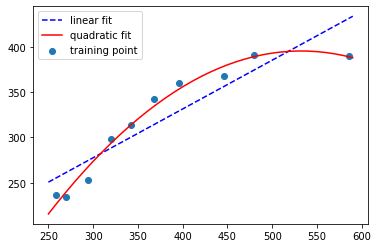

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics._regression import mean_squared_error, r2_score  #모델의 성능평가를 위한 라이브러리
import numpy as np

x = np.array([258,270,294,320,342,368,396,446,480,586])[:,np.newaxis]
y = np.array([236,234,253,298,314,342,360,368,391,390])
print(x, x.shape)
print(y)

lr = LinearRegression()  #1차방정식용. 선형회귀모델
pr = LinearRegression()  #2차방정식용. 다항회귀모델

polyf = PolynomialFeatures(degree=2)
x_quad = polyf.fit_transform(x)

x_fit = np.arange(250,600,10)[:,np.newaxis]

#선형회귀 모델
lr.fit(x, y)
y_lin_fit = lr.predict(x_fit)
print(y_lin_fit)

#다항회귀 모델
pr.fit(x_quad, y)
y_quad_fit = pr.predict(polyf.fit_transform(x_fit))
print(y_quad_fit)

#그래프
import matplotlib.pyplot as plt
plt.scatter(x, y, label = 'training point')
plt.plot(x_fit, y_lin_fit, label = 'linear fit', linestyle = '--', c='b')
plt.plot(x_fit, y_quad_fit, label = 'quadratic fit', c='r')
plt.legend()
plt.show()

<br>

## 모델 평가 : MSE와 R²값으로 모델 비교 


In [ ]:
y_lin_pred = lr.predict(x)
print('y_lin_pred:', y_lin_pred)

y_quad_pred = pr.predict(x_quad)
print('y_quad_pred:', y_quad_pred)
print()

#MSE(평균제곱오차) 
print('선형모델 MSE: %.3f'%mean_squared_error(y, y_lin_pred))
print('다항모델 MSE: %.3f'%mean_squared_error(y, y_quad_pred))
print()

#R²(결정계수)
print('선형모델 R²: %.3f'%r2_score(y, y_lin_pred))
print('다항모델 R²: %.3f'%r2_score(y, y_quad_pred))

y_lin_pred: [254.95369495 261.42620055 274.37121174 288.39497387 300.26123414
 314.28499627 329.38750933 356.35628266 374.69504852 431.86884797]
y_quad_pred: [225.56346079 240.11490613 267.26572086 293.74195218 313.75904653
 334.59594733 353.61955374 378.77882554 389.43443486 389.12615204]

선형모델 MSE: 570.885
다항모델 MSE: 58.294

선형모델 R²: 0.831
다항모델 R²: 0.983
